Source:
https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Monthly-counts-per-hour/b2ak-trbp

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Pedestrians.csv", thousands = ",")
df.index = df.Date_Time.astype('datetime64')
df2 = df.drop_duplicates(subset = 'Date_Time', keep = False)

In [3]:
del df2['Sensor_ID']
del df2['Sensor_Name']
del df2['ID']
del df2['Date_Time']

In [4]:
df2.sort_index(inplace=True)

c:\Users\mi.martowicz\Anaconda3\lib\site-packages\pandas\core\frame.py:5582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


<AxesSubplot:xlabel='Date_Time', ylabel='Hourly_Counts'>

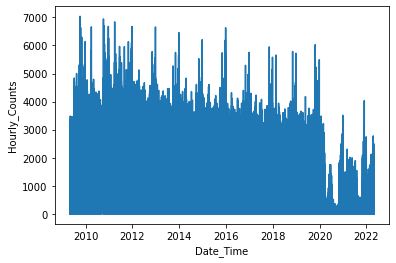

In [5]:
sns.lineplot(x=df2.index, y='Hourly_Counts', data=df2)

In [6]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52
2009-05-01 01:00:00,2009,May,1,Friday,1,34
2009-05-01 02:00:00,2009,May,1,Friday,2,19
2009-05-01 03:00:00,2009,May,1,Friday,3,14
2009-05-01 04:00:00,2009,May,1,Friday,4,15


In [7]:
df2.tail()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2022-04-30 19:00:00,2022,April,30,Saturday,19,489
2022-04-30 20:00:00,2022,April,30,Saturday,20,403
2022-04-30 21:00:00,2022,April,30,Saturday,21,310
2022-04-30 22:00:00,2022,April,30,Saturday,22,445
2022-04-30 23:00:00,2022,April,30,Saturday,23,244


In [8]:
import statsmodels.formula.api as sm

In [9]:
df2['Trend'] = range(1,len(df2)+1)

<ipython-input-9-34a127a3adb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Trend'] = range(1,len(df2)+1)


In [10]:
df2['LogPed'] = np.log(df2.Hourly_Counts+1)

<ipython-input-10-4007c2a90712>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogPed'] = np.log(df2.Hourly_Counts+1)


In [22]:
df2_in = df2[df2.index <= "2020-01-01"]

In [23]:
model = sm.ols(formula="LogPed ~ Trend + C(Month) + C(Day) + C(Time)", data=df2_in)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LogPed   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.088e+04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:39:38   Log-Likelihood:                -78745.
No. Observations:               92564   AIC:                         1.576e+05
Df Residuals:                   92522   BIC:                         1.580e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.7095      0.012    377.091      0.000       4.685       4.734
C(Month)[T.August]       -0.1836      0.009    -20.053      0.000      -0.202      -0.166
C(Month)[T.December]      0.2796      0.009     30.538      0.000       0.262       0.298
C(Month)[T.February]      0.0013      0.010      0.139      0.890      -0.017       0.020
C(Month)[T.January]      -0.0334      0.009     -3.563      0.000      -0.052      -0.015
C(Month)[T.July]         -0.1044      0.009    -11.399      0.000      -0.122      -0.086
C(Month)[T.June]         -0.1382      0.009    -14.979      0.000      -0.156      -0.120
C(Month)[T.March]         0.0082      0.009      0.878      0.380      -0.010       0.027
C(Month)[T.May]          -0.1393      0.009    -15.206      0.000      -0.157      -0.121
C(Month)[T.November]      0.0480      0.009      5.200      0.000       0.030       0.066
C(Month)[T.October]      -0.0879      0.009     -9.533      0.000      -0.106      -0.070
C(Month)[T.September]    -0.1385      0.009    -14.657      0.000      -0.157      -0.120
C(Day)[T.Monday]         -0.4196      0.007    -60.267      0.000      -0.433      -0.406
C(Day)[T.Saturday]       -0.0079      0.007     -1.136      0.256      -0.022       0.006
C(Day)[T.Sunday]         -0.2160      0.007    -31.021      0.000      -0.230      -0.202
C(Day)[T.Thursday]       -0.2361      0.007    -33.863      0.000      -0.250      -0.222
C(Day)[T.Tuesday]        -0.4256      0.007    -61.097      0.000      -0.439      -0.412
C(Day)[T.Wednesday]      -0.3537      0.007    -50.732      0.000      -0.367      -0.340
C(Time)[T.1]             -0.4895      0.013    -37.934      0.000      -0.515      -0.464
C(Time)[T.2]             -0.9312      0.013    -72.148      0.000      -0.956      -0.906
C(Time)[T.3]             -1.1432      0.013    -88.604      0.000      -1.169      -1.118
C(Time)[T.4]             -1.3154      0.013   -101.947      0.000      -1.341      -1.290
C(Time)[T.5]             -1.0573      0.013    -81.948      0.000      -1.083      -1.032
C(Time)[T.6]             -0.0970      0.013     -7.521      0.000      -0.122      -0.072
C(Time)[T.7]              0.8685      0.013     67.308      0.000       0.843       0.894
C(Time)[T.8]              1.7789      0.013    137.868      0.000       1.754       1.804
C(Time)[T.9]              2.2572      0.013    174.937      0.000       2.232       2.282
C(Time)[T.10]             2.7814      0.013    215.564      0.000       2.756       2.807
C(Time)[T.11]             3.1742      0.013    246.008      0.000       3.149       3.199
C(Time)[T.12]             3.6143      0.013    280.118      0.000       3.589       3.640
C(Time)[T.13]             3.7296      0.013    289.057      0.000       3.704       3.755
C(Time)[T.14]          

In [24]:
df2['LogPedFC'] = results.predict(df2)

<ipython-input-24-5c65ec6056f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogPedFC'] = results.predict(df2)


In [25]:
df2['PedestriansFC'] = np.exp(df2.LogPedFC)-1

<ipython-input-25-20cc74279563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PedestriansFC'] = np.exp(df2.LogPedFC)-1


In [26]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPasFC,PedestriansFC,LogPedFC
Date_Time,,,,,,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52,1,3.970292,4.569740,95.568276,4.570250
2009-05-01 01:00:00,2009,May,1,Friday,1,34,2,3.555348,4.080939,58.192730,4.080799
2009-05-01 02:00:00,2009,May,1,Friday,2,19,3,2.995732,3.639201,37.055521,3.639046
2009-05-01 03:00:00,2009,May,1,Friday,3,14,4,2.708050,3.427251,29.784808,3.427021
2009-05-01 04:00:00,2009,May,1,Friday,4,15,5,2.772589,3.255231,24.915740,3.254850


<AxesSubplot:xlabel='Date_Time'>

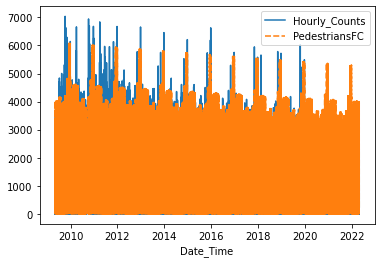

In [27]:
dfplot = df2.filter(['Hourly_Counts', 'PedestriansFC'])
sns.lineplot(data=dfplot)

<AxesSubplot:xlabel='Date_Time'>

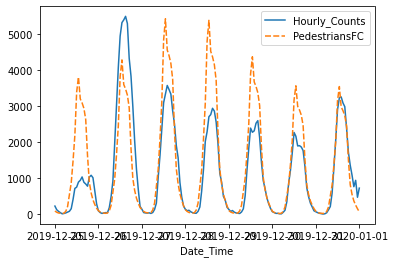

In [28]:
dfplot = df2.filter(['Hourly_Counts', 'PedestriansFC'])[(df2.index >= '2019-12-25') & (df2.index <= '2020-01-01')]
sns.lineplot(data=dfplot)

In [29]:
df3 = df2[df2.index <= "2020-01-01"]

In [31]:
df3.Hourly_Counts - df3.PedestriansFC

Date_Time
2009-05-01 00:00:00    -43.568276
2009-05-01 01:00:00    -24.192730
2009-05-01 02:00:00    -18.055521
2009-05-01 03:00:00    -15.784808
2009-05-01 04:00:00     -9.915740
                          ...    
2019-12-31 20:00:00    534.444065
2019-12-31 21:00:00    394.982782
2019-12-31 22:00:00    688.615646
2019-12-31 23:00:00    316.574801
2020-01-01 00:00:00    659.197062
Length: 92564, dtype: float64

In [34]:
df2[df2.index == '2022-01-01']

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPasFC,PedestriansFC,LogPedFC
Date_Time,,,,,,,,,,,
2022-01-01,2022,January,1,Saturday,0,286,110108,5.659482,4.523667,91.264497,4.524659
